In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [308]:
df = pd.read_csv("dataset_group.csv")

In [309]:
df.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [310]:
df.shape

(20641, 3)

In [311]:
df.isnull().sum()

Date        0
Order_id    0
Product     0
dtype: int64

In [312]:
df.duplicated().sum()

4730

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [314]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_id,20641.0,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0


### Exploratory Analysis

In [315]:
# Transformation

df['Product'] = df['Product'].str.capitalize()

In [316]:
df.Product.value_counts().reset_index()

,index,Product
0,Poultry,640
1,Soda,597
2,Cereals,591
3,Ice cream,579
4,Cheeses,578
5,Waffles,575
6,Soap,574
7,Lunch meat,573
8,Bagels,573
9,Eggs,570


In [317]:
df = df.drop(df[(df.Product == 'All- purpose') | (df.Product == 'Mixes')].index)

In [318]:
df.shape

(19536, 3)

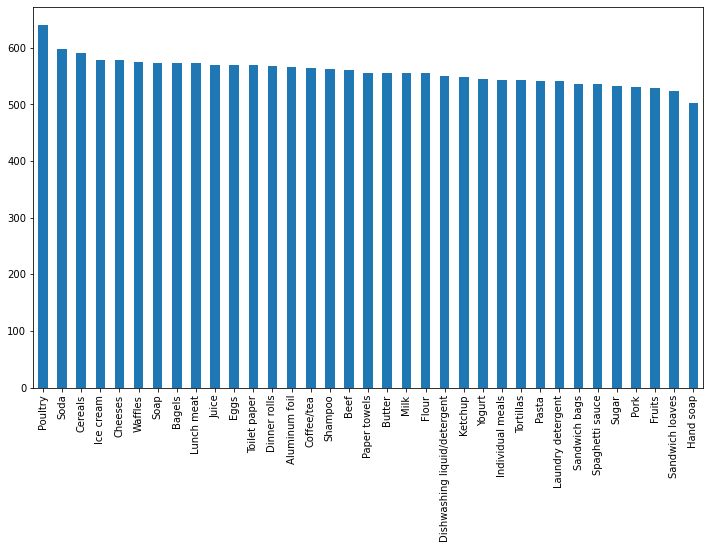

In [319]:
df['Product'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(12,7));

In [320]:
df['DateTime'] = pd.to_datetime(df['Date'])

In [321]:
df.drop(['Date'],axis = 1, inplace = True)

In [322]:
df.set_index('DateTime', inplace = True)

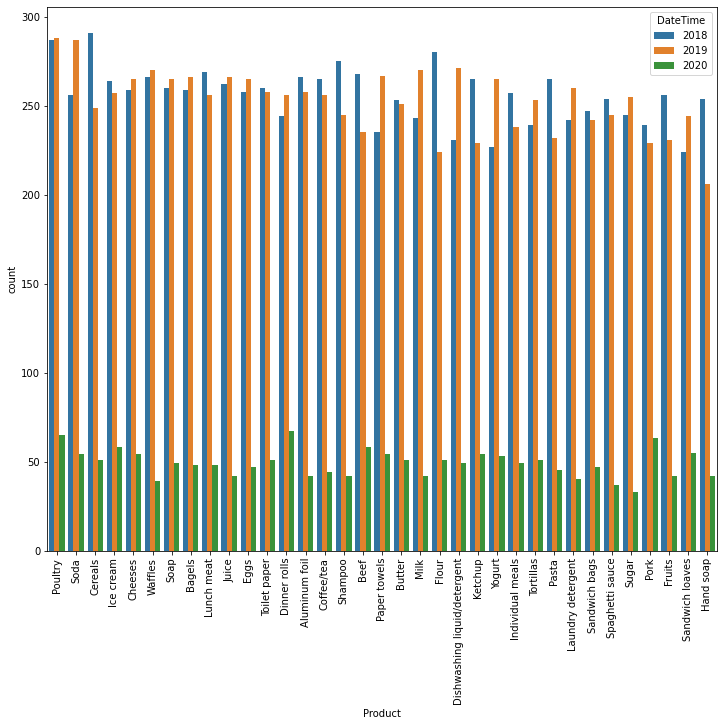

In [323]:
plt.figure(figsize=(12,10))
sns.countplot(x = df['Product'], hue = df.index.year, order = df['Product'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation = 90);

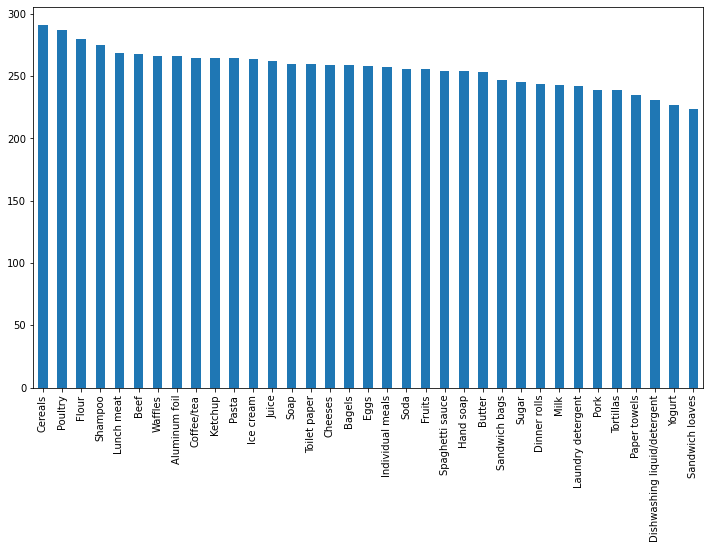

In [324]:
df[df.index.year == 2018]['Product'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(12,7));

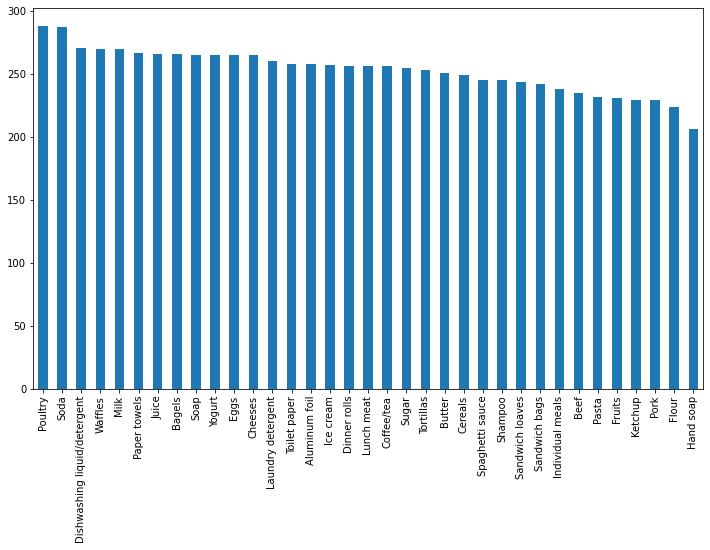

In [325]:
df[df.index.year == 2019]['Product'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(12,7));

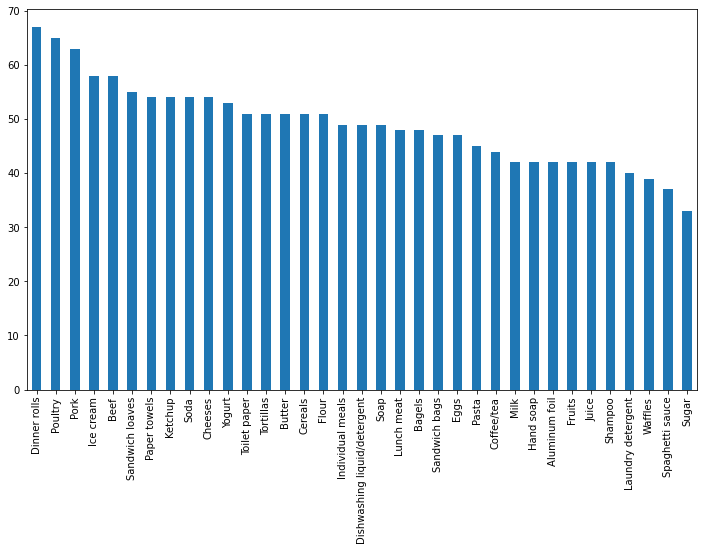

In [326]:
df[df.index.year == 2020]['Product'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(12,7));

In [327]:
df[df['Product'] == 'Poultry'].index.month.value_counts()

1     82
2     79
4     68
6     68
5     64
3     63
7     62
8     52
9     51
12    22
11    18
10    11
Name: DateTime, dtype: int64

### Market Basket Analysis (Association Rules)

In [328]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Disabling Warning
import warnings
warnings.simplefilter('ignore')

In [329]:
basket_assign=df.groupby(['Order_id', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')

In [330]:
basket_assign.head()

Product,Aluminum foil,Bagels,Beef,Butter,Cereals,Cheeses,Coffee/tea,Dinner rolls,Dishwashing liquid/detergent,Eggs,...,Sandwich loaves,Shampoo,Soap,Soda,Spaghetti sauce,Sugar,Toilet paper,Tortillas,Waffles,Yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [331]:
def encode_zero_one(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [332]:
basket=basket_assign.applymap(encode_zero_one)

#### Finding the support using Apriori

In [333]:
itemsets = apriori(basket, min_support = 0.05, use_colnames = True, low_memory=True)
itemsets

,support,itemsets
0,0.384548,(Aluminum foil)
1,0.385426,(Bagels)
2,0.374890,(Beef)
3,0.367867,(Butter)
4,0.395961,(Cereals)
...,...,...
7154,0.051800,"(Eggs, Dinner rolls, Soda, Poultry)"
7155,0.051800,"(Dinner rolls, Spaghetti sauce, Poultry, Ice c..."
7156,0.051800,"(Juice, Dinner rolls, Spaghetti sauce, Poultry)"
7157,0.053556,"(Laundry detergent, Dinner rolls, Spaghetti sa..."


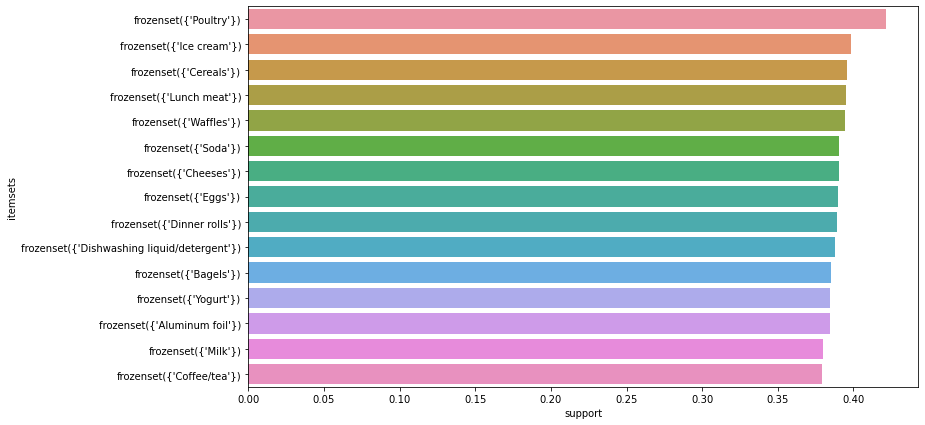

In [334]:
plt.figure(figsize=(12,7))
sns.barplot(itemsets.sort_values('support',ascending=False).iloc[0:15,0],
            itemsets.sort_values('support',ascending=False).iloc[0:15,1])
#plt.xticks(rotation=90)
plt.show()

#### Check the rules using association_rules

In [335]:
basket = association_rules(itemsets, metric ="lift") 
basket = basket.sort_values(['lift','confidence'], ascending =[False, False]) 

In [336]:
basket.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40462,"(Pasta, Paper towels)","(Eggs, Ice cream)",0.164179,0.166813,0.055312,0.336898,2.019617,0.027924,1.256500
40459,"(Eggs, Ice cream)","(Pasta, Paper towels)",0.166813,0.164179,0.055312,0.331579,2.019617,0.027924,1.250441
40461,"(Pasta, Ice cream)","(Eggs, Paper towels)",0.167691,0.165935,0.055312,0.329843,1.987784,0.027486,1.244581
40460,"(Eggs, Paper towels)","(Pasta, Ice cream)",0.165935,0.167691,0.055312,0.333333,1.987784,0.027486,1.248464
40378,"(Dinner rolls, Paper towels)","(Eggs, Pasta)",0.155399,0.169447,0.051800,0.333333,1.967185,0.025468,1.245830


In [359]:
recommend = basket[(basket["consequent support"] > 0.2) & (basket["confidence"] > 0.3)].sort_values('confidence', ascending = False)

In [360]:
recommend.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40413,"(Dinner rolls, Spaghetti sauce, Ice cream)",(Poultry),0.075505,0.421422,0.051800,0.686047,1.627931,0.019980,1.842877
40314,"(Cereals, Sandwich bags, Bagels)",(Cheeses),0.075505,0.390694,0.050922,0.674419,1.726209,0.021423,1.871441
40440,"(Laundry detergent, Dinner rolls, Spaghetti sa...",(Poultry),0.081651,0.421422,0.053556,0.655914,1.556429,0.019146,1.681491
40454,"(Eggs, Pasta, Ice cream)",(Paper towels),0.085162,0.362599,0.055312,0.649485,1.791193,0.024432,1.818468
40456,"(Eggs, Paper towels, Ice cream)",(Pasta),0.086040,0.371378,0.055312,0.642857,1.731003,0.023358,1.760140


In [345]:
# Support Calculation
val = basket_assign[(basket_assign["Dinner rolls"] > 0) & (basket_assign["Spaghetti sauce"] > 0) & (basket_assign["Ice cream"] > 0) & (basket_assign["Poultry"] > 0)].count()[0]
tot = basket_assign.count()[0]

val/tot

0.05179982440737489

In [348]:
# Confidence Calculation
val = basket_assign[(basket_assign["Dinner rolls"] > 0) & (basket_assign["Spaghetti sauce"] > 0) & (basket_assign["Ice cream"] > 0) & (basket_assign["Poultry"] > 0)].count()[0]
valX = basket_assign[(basket_assign["Dinner rolls"] > 0) & (basket_assign["Spaghetti sauce"] > 0) & (basket_assign["Ice cream"] > 0)].count()[0]

val/valX

0.686046511627907

In [353]:
# Lift Calculation
val = basket_assign[(basket_assign["Dinner rolls"] > 0) & (basket_assign["Spaghetti sauce"] > 0) & (basket_assign["Ice cream"] > 0) & (basket_assign["Poultry"] > 0)].count()[0]
valA = basket_assign[(basket_assign["Dinner rolls"] > 0) & (basket_assign["Spaghetti sauce"] > 0) & (basket_assign["Ice cream"] > 0)].count()[0]
valB = basket_assign[(basket_assign["Poultry"] > 0)].count()[0]
tot = tot = basket_assign.count()[0]

(val/valA)/(valB/tot)

1.6279312015503875

In [365]:
sing_recomm = recommend[['antecedents','consequents','lift']]

In [371]:
sing_recomm['RN'] = sing_recomm.sort_values(['lift'], ascending=[False]).groupby(['antecedents']).cumcount() + 1

In [380]:
sing_recomm = sing_recomm[sing_recomm['RN'] == 1]

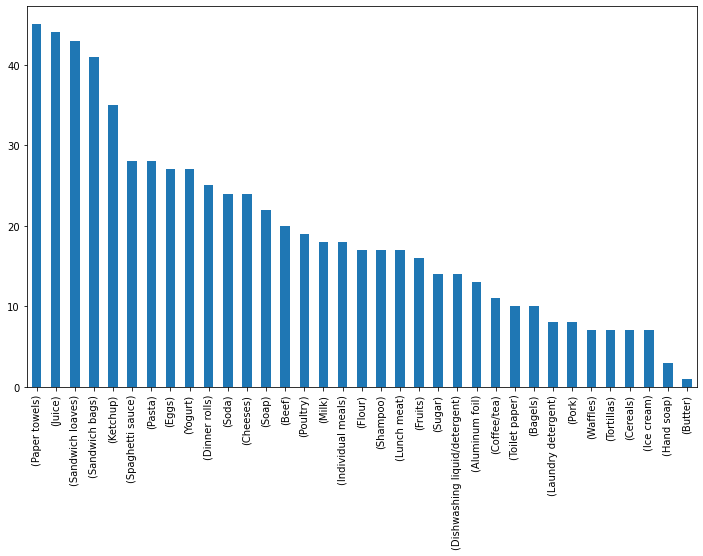

In [384]:
sing_recomm['consequents'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(12,7));

In [387]:
sing_recomm.sort_values('lift',ascending = False).head()

,antecedents,consequents,lift,RN
40454,"(Eggs, Pasta, Ice cream)",(Paper towels),1.791193,1
40456,"(Eggs, Paper towels, Ice cream)",(Pasta),1.731003,1
40314,"(Cereals, Sandwich bags, Bagels)",(Cheeses),1.726209,1
40302,"(Aluminum foil, Yogurt, Toilet paper)",(Juice),1.700401,1
40316,"(Cereals, Bagels, Cheeses)",(Sandwich bags),1.659641,1
